In [23]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/626.3 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 2.0 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00


In [20]:
!pip install Matplotlib

In [18]:
!pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 544.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 798.9 kB/s eta 0:00:01
   ---------------------------- ----------- 215.0/301.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00


In [11]:
!pip install pyaudio

  Using cached PyAudio-0.2.14-cp312-cp312-win_amd64.whl.metadata (2.7 kB)
Using cached PyAudio-0.2.14-cp312-cp312-win_amd64.whl (164 kB)


In [3]:
!pip install nltk

  Using cached regex-2023.12.25-cp312-cp312-win_amd64.whl.metadata (41 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 3.6 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.5 MB 3.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 2.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 3.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.3 MB/s eta 0:00:01
   -------------

In [4]:
!pip install SpeechRecognition

  Using cached SpeechRecognition-3.10.3-py2.py3-none-any.whl.metadata (29 kB)
Using cached SpeechRecognition-3.10.3-py2.py3-none-any.whl (32.8 MB)


In [24]:
import speech_recognition as sr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob



In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Aakash
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Aakash
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
recognizer = sr.Recognizer()
with sr.Microphone() as source:
    print("Listening...")
    recognizer.adjust_for_ambient_noise(source)
    audio = recognizer.listen(source)

text = recognizer.recognize_google(audio)
print("You said :", text)

Listening...
You said : hello guys so welcome to my YouTube channel but this is a bad bad YouTube channel where all sort of rubbish things are


In [40]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
text  = ' '.join(filtered_text)
print(text)

hello guys welcome YouTube channel bad bad YouTube channel sort rubbish things


In [41]:
# Tokenize the text into words
words = word_tokenize(text)
# Create a frequency distribution of words
freq_dist = FreqDist(words)
# Print the most common words
print("Summary:")
for word, frequency in freq_dist.most_common(5):
    print(f"{word}: {frequency}")



Summary:
YouTube: 2
channel: 2
bad: 2
hello: 1
guys: 1


In [42]:
blob = TextBlob(text)
sentiment = blob.sentiment
print("Sentiment Analysis:")
print("Polarity:", sentiment.polarity)
print("Subjectivity:", sentiment.subjectivity)
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity

Sentiment Analysis:
Polarity: -0.19999999999999987
Subjectivity: 0.7444444444444445


In [43]:
def map_sentiment(value):
    if value == 0:
        return "Neutral"
    elif 0 < value < 0.5:
        return "Slightly Positive"
    elif value >= 0.5:
        return "Highly Positive"
    elif -0.5 < value < 0:
        return "Slightly Negative"
    else:
        return "Highly Negative"

In [44]:
def print_sentiment_analysis(polarity, subjectivity):
    polarity_sentiment = map_sentiment(polarity)
    subjectivity_sentiment = map_sentiment(subjectivity)
    
    print("Polarity Sentiment:", polarity_sentiment)
    print("Subjectivity Sentiment:", subjectivity_sentiment)

In [45]:
print_sentiment_analysis(polarity, subjectivity)

Polarity Sentiment: Slightly Negative
Subjectivity Sentiment: Highly Positive


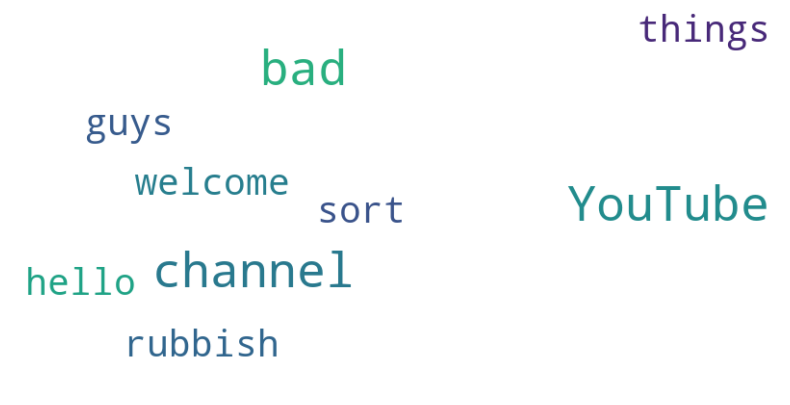

In [46]:
 wordcloud = WordCloud(width=800, height=400, background_color='white',max_font_size=50).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()